In [1]:
# project: p2
# submitter: raffanti
# partner: none
# hours: 10

In [2]:
import pandas as pd
import loans
import json
import csv
from search import Node, BST
from loans import Applicant, Bank, Loan
import math
import time
import timeit
import statistics
import matplotlib.pyplot as plt

In [3]:
fhb = loans.Bank("First Home Bank")

In [4]:
#Q1
interest_rates = [loan.interest_rate for loan in fhb.loans if loan.interest_rate != -1]
avg_interest_rate = sum(interest_rates)/len(interest_rates)
avg_interest_rate

2.962962962962963

In [5]:
#Q2
total_applicants = sum([len(loan.applicants) for loan in fhb.loans])
avg_applicants = total_applicants / len(fhb.loans)
avg_applicants

1.5777777777777777

In [6]:
#Q3
applicant_fhb = []
for loan in fhb:
    if loan.applicants != -1:
        applicant_fhb.append(loan.applicants)
dict_ages = {}
for applicant_file in applicant_fhb:
    for applicant in applicant_file:
        str_app = str(applicant)
        str_app = str_app.split("'")
        str_app = str_app[1].split("'")
        age = str_app[0]
        if age not in dict_ages.keys():
            dict_ages[age] = 0
        if age in dict_ages.keys():
            dict_ages[age] += 1
dict_ages

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [7]:
bst = BST()
for loan in fhb:
    bst.add(loan.interest_rate, loan)

In [8]:
#Q4
missing_rates = bst.root.lookup(-1)
num_missing = len(missing_rates)
num_missing

18

In [9]:
#Q5
bst.height()

9

In [10]:
uwcu_bank = loans.Bank("University of Wisconsin Credit Union")
uwcu_bst = BST()

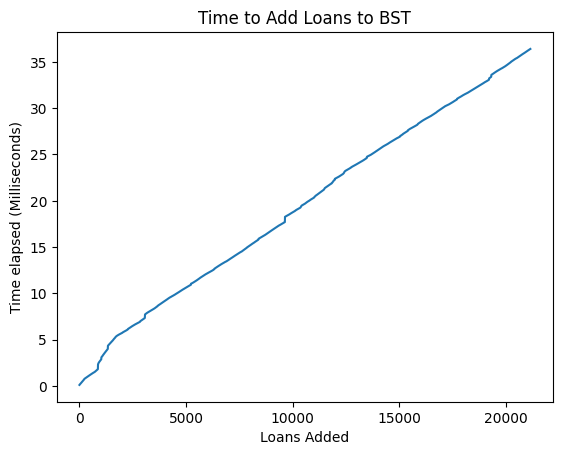

In [11]:
#Q6
times = []
loans_added = []
start_time = time.time()
for i, loan in enumerate(uwcu_bank.loans):
    uwcu_bst.add(loan.interest_rate, loan)
    loans_added.append(i+1)
    elapsed_time = (time.time() - start_time) * 1000
    times.append(elapsed_time)

plt.plot(loans_added, times)
plt.xlabel("Loans Added")
plt.ylabel("Time elapsed (Milliseconds)")
plt.title("Time to Add Loans to BST")
plt.show()

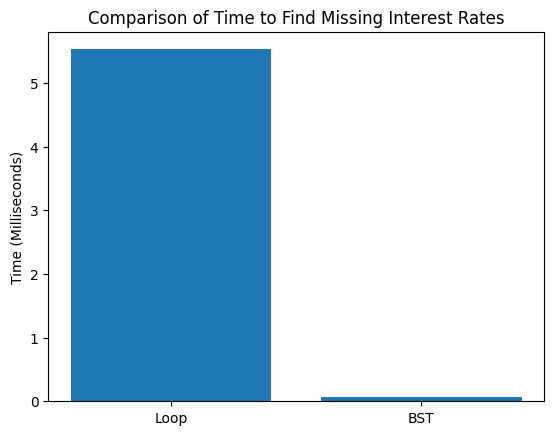

In [12]:
#Q7
start_time = time.time()
counter = 0
for loan in uwcu_bank.loans:
    if loan.interest_rate == -1:
        counter += 1
end_time = time.time()
elapsed_time_loop = (end_time - start_time) * 1000

start_time = time.time()
missing_rates_len = len(uwcu_bst[-1])
end_time = time.time()
elapsed_time_bst = (end_time - start_time) * 1000

labels = ['Loop', 'BST']
times = [elapsed_time_loop, elapsed_time_bst]
plt.bar(labels, times)
plt.ylabel('Time (Milliseconds)')
plt.title('Comparison of Time to Find Missing Interest Rates')
plt.show()

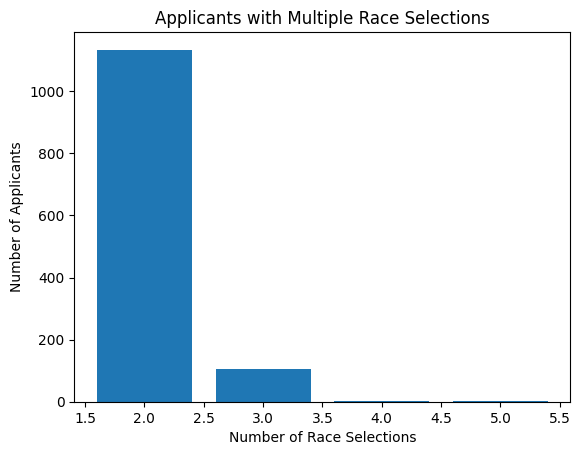

In [13]:
#Q8
num_multiple_races = {}
for loan in uwcu_bank:
    for applicant in loan.applicants:
        num_races = len(applicant.race)
        if num_races > 1:
            if num_races not in num_multiple_races:
                num_multiple_races[num_races] = 0
            num_multiple_races[num_races] += 1

x = list(num_multiple_races.keys())
y = list(num_multiple_races.values())
plt.bar(x, y)
plt.xlabel("Number of Race Selections")
plt.ylabel("Number of Applicants")
plt.title("Applicants with Multiple Race Selections")
plt.show()

In [14]:
#Q9
num_leaf_nodes = uwcu_bst.count_leaf_nodes()
num_leaf_nodes

9

In [15]:
#Q10
third_largest = uwcu_bst.third_largest_interest_rate()
third_largest

5.99